In [38]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

class DNN(keras.Sequential):
  def __init__(self, layer, units, activation, input_shape, dropout_rate, optimizer, loss):
    super().__init__()
    self.add(layers.Dense(units=units,activation=activation,input_shape=input_shape))
    self.add(layers.Dropout(dropout_rate))
    self.add(layers.BatchNormalization())
    for i in range(1,layer):
      self.add(layers.Dense(units=units,activation=activation))
      self.add(layers.Dropout(dropout_rate))
      self.add(layers.BatchNormalization())
    self.add(layers.Dense(units=1))
    self.compile(optimizer=optimizer,loss=loss)

def load_data_set(data):
  col_name = list(data.columns)
  col_name.pop(0)
  _X=[]
  _y=[]
  x_values=[]
  y_values=[]
  for i in range(0,len(col_name)):
    date = col_name[i]
    y_values = list(data[date])
    x_values = date.split('-')
    x_values = [int(x) for x in x_values]
    for j in range(0,24):
      if y_values[j] == 0 :
        continue
      if y_values[j] > 100000:
        print(x_values)
      _X.append(x_values+[j])
      _y.append(y_values[j])
  return _X,_y

def group_split(X,y,train_size):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  random = np.random.uniform(0,1,len(y))
  for i in range(0,len(y)):
    if random[i] < train_size:
      X_train.append(X[i])
      y_train.append(y[i])
    else:
      X_val.append(X[i])
      y_val.append(y[i])
  return X_train, y_train, X_val, y_val 


  

load_data = pd.read_csv('/content/average_power.csv')


layer = 5
units = 128
activation = 'relu'
train_size = 0.75
input_shape= [4]
dropout_rate = 0.5
optimizer = 'adam'
loss = 'mae'

batch_size = 1024
epochs = 1000

X, y = load_data_set(load_data)
print(X)

X_train, y_train, X_val, y_val = group_split(X, y, train_size)
print(X_train)


model = DNN(layer,units,activation,input_shape,dropout_rate,optimizer,loss)
#print(model)
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


[[2020, 6, 2, 0], [2020, 6, 2, 1], [2020, 6, 2, 2], [2020, 6, 2, 3], [2020, 6, 2, 4], [2020, 6, 2, 5], [2020, 6, 2, 6], [2020, 6, 2, 7], [2020, 6, 2, 8], [2020, 6, 2, 9], [2020, 6, 2, 10], [2020, 6, 2, 11], [2020, 6, 2, 12], [2020, 6, 2, 13], [2020, 6, 2, 14], [2020, 6, 2, 15], [2020, 6, 2, 16], [2020, 6, 2, 17], [2020, 6, 2, 18], [2020, 6, 2, 19], [2020, 6, 2, 20], [2020, 6, 2, 21], [2020, 6, 2, 22], [2020, 6, 2, 23], [2020, 6, 3, 0], [2020, 6, 3, 1], [2020, 6, 3, 2], [2020, 6, 3, 3], [2020, 6, 3, 4], [2020, 6, 3, 5], [2020, 6, 3, 6], [2020, 6, 3, 7], [2020, 6, 3, 8], [2020, 6, 3, 9], [2020, 6, 3, 10], [2020, 6, 3, 11], [2020, 6, 3, 12], [2020, 6, 3, 13], [2020, 6, 3, 14], [2020, 6, 3, 15], [2020, 6, 3, 16], [2020, 6, 3, 17], [2020, 6, 3, 18], [2020, 6, 3, 19], [2020, 6, 3, 20], [2020, 6, 3, 21], [2020, 6, 3, 22], [2020, 6, 3, 23], [2020, 6, 4, 0], [2020, 6, 4, 1], [2020, 6, 4, 2], [2020, 6, 4, 3], [2020, 6, 4, 4], [2020, 6, 4, 5], [2020, 6, 4, 6], [2020, 6, 4, 7], [2020, 6, 4, 8], [2

In [39]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=0, # suppress output since we'll plot the curves
)

Minimum Validation Loss: 2139.8760


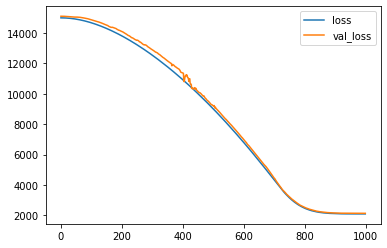

In [40]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [41]:
model.save('model1')

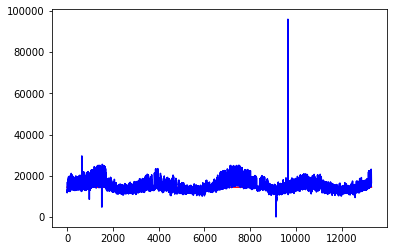

In [42]:
new_model = keras.models.load_model('model1')

import matplotlib.pyplot as plt

predict = new_model.predict(X)
plt.plot(predict,'r')
plt.plot(y,'b')